# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [47]:
# Import API key
import api_keys

In [48]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [49]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [50]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [52]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [53]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
   

In [54]:
 # Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

In [56]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
# Create empty list to append data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b&q=bluff
Processing Record 2 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b&q=katsuura
Processing Record 3 | Corn Island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b&q=corn%20island
Processing Record 4 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b&q=arraial%20do%20cabo
Processing Record 5 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b&q=kodiak
Processing Record 6 | Tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f08b3ecdc97892171f94996b40b98d0b&q=tsiroanomandidy
Processing Record 7 | Kavaratti
http://api.openweatherm

In [62]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [66]:
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,47,AU,1573060689,83,-23.58,149.07,61.59,4.03
1,Katsuura,20,JP,1573060741,87,33.93,134.50,50.00,10.29
2,Corn Island,90,NI,1573060800,79,12.17,-83.04,82.80,17.72
3,Arraial do Cabo,75,BR,1573060703,78,-22.97,-42.02,78.80,9.17
4,Kodiak,1,US,1573060702,58,39.95,-94.76,57.99,3.36


In [72]:
# Save data frame to CSV
weather_data.to_csv('output_data_file')

In [64]:
# Display count of weather data values 
weather_data.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

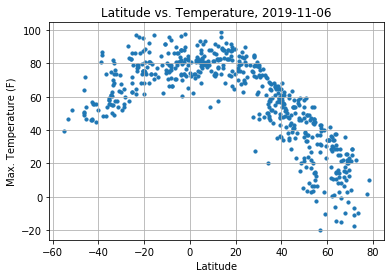

In [84]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature, 2019-11-06")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

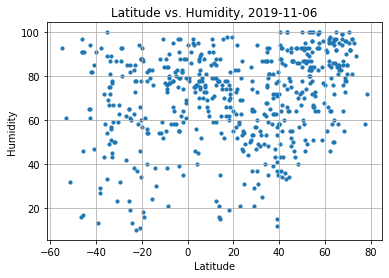

In [83]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity, 2019-11-06")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

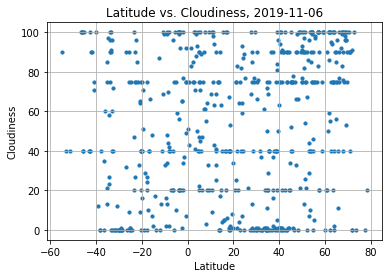

In [82]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness, 2019-11-06")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

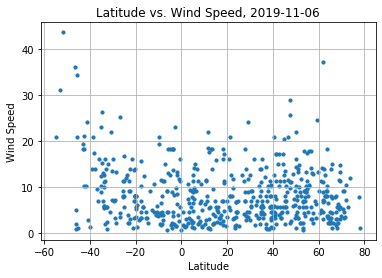

In [85]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed, 2019-11-06")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_speed_vs_Latitude.png")

# Show plot
plt.show()

In [ ]:
OBSERVABLE TREND IN THE PLOT
1). The farther the cities closer to the equator (Lat 0) seem to experience a higher temperature than the ones farther away.
2). The cloudiness observed in the cities does not seem to be a function of the proximity to the equator.
3). The wind speed observed in most of the cities is below 20mph especially the ones closer to the equator.